# Diamond Dataset
About this Dataset
Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
#let me import the libraries I may need
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"


import scipy.stats as stats

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#read the file and display five first rows
df_diamond = pd.read_csv("datasets/diamonds.csv")
df_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#rename your column Unnamed: 0 to Number, then make NUmber as index
df_diamond.rename(columns={'Unnamed: 0':'Number'},inplace=True)
df_diamond.set_index('Number',inplace=True)
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#sanity check
print("number of rows in the datset:", len(df_diamond))
print("number of rows and columns:", df_diamond.shape)

number of rows in the datset: 53940
number of rows and columns: (53940, 10)


In [5]:
#any null value?
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#what are the types of each feature
df_diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
#brief statistical summary of the dataset
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


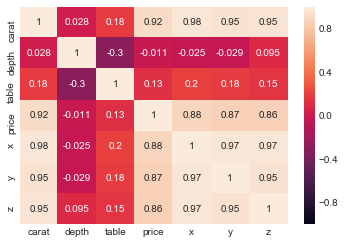

In [8]:
#correlation matrix
dia_corr=df_diamond.corr()
#show it as a heast map
sns.heatmap(dia_corr,vmin=-1,annot=True)

We note here that price is strongly correlated with  carat, x, y, z. 
Carat is also correlated with x, y, z and 

In [9]:
#predicting price vs other features using statistical models
result = smf.ols('price ~ carat + cut + clarity + x + y + z + color + depth + table', data=df_diamond).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:32:02   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2184.4774    408.197      5.352      0.000    1384.409    2984.546
cut[T.Good]        579.7514     33.592     17.259      0.000     513.911     645.592
cut[T.Ideal]       832.9118     33.407     24.932      0.000     767.433     898.391
cut[T.Premium]     762.1440     32.228     23.649      0.000     698.978     825.310
cut[T.Very Good]   726.7826     32.241     22.542      0.000     663.591     789.975
clarity[T.IF]     5345.1022     51.024    104.757      0.000    5245.095    5445.110
clarity[T.SI1]    3665.4721     43.634     84.005      0.000    3579.949    3750.995
clarity[T.SI2]    2702.5863     43.818     61.677      0.000    2616.702    2788.471
clarity[T.VS1]    4578.3979     44.546    102.779      0.000    4491.087    4665.708
clarity[T.VS2]    4267.2236     43.853     97.306      0.000    4181.270    4353.177
clarity[T.VVS1]   5007.7590     47.160    106.187      0.000    4915.326    5100.192
clarity[T.VVS2]   4950.8141     45.855    107.967      0.000    4860.938    5040.690
color[T.E]        -209.1181     17.893    -11.687      0.000    -244.189    -174.047
color[T.F]        -272.8538     18.093    -15.081      0.000    -308.316    -237.392
color[T.G]        -482.0389     17.716    -27.209      0.000    -516.763    -447.315
color[T.H]        -980.2667     18.836    -52.043      0.000   -1017.185    -943.348
color[T.I]       -1466.2445     21.162    -69.286      0.000   -1507.723   -1424.766
color[T.J]       -2369.3981     26.131    -90.674      0.000   -2420.615   -2318.181
carat             1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
x                -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
y                    9.6089     19.333      0.497      0.619     -28.284      47.502
z                  -50.1189     33.486     -1.497      0.134    -115.752      15.515
depth              -63.8061      4.535    -14.071      0.000     -72.694     -54.918
table              -26.4741      2.912     -9.092      0.000     -32.181     -20.767
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us remove y, z from regression, not correlated
because we see P >|t| values of 0.619, 0.134

In [10]:
#set to coefficients to zero
result = smf.ols('price ~ carat + cut + clarity + x +  color + depth + table -1', data=df_diamond).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:32:04   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cut[Fair]        2366.0858    390.351      6.061      0.000    1600.995    3131.177
cut[Good]        2946.3263    383.841      7.676      0.000    2193.994    3698.658
cut[Ideal]       3199.3461    375.992      8.509      0.000    2462.399    3936.293
cut[Premium]     3128.8443    380.057      8.233      0.000    2383.930    3873.759
cut[Very Good]   3092.9059    380.335      8.132      0.000    2347.446    3838.366
clarity[T.IF]    5344.3381     51.015    104.761      0.000    5244.349    5444.327
clarity[T.SI1]   3664.9053     43.627     84.005      0.000    3579.396    3750.415
clarity[T.SI2]   2702.0771     43.812     61.674      0.000    2616.205    2787.949
clarity[T.VS1]   4577.5892     44.535    102.786      0.000    4490.300    4664.879
clarity[T.VS2]   4266.6117     43.847     97.308      0.000    4180.672    4352.551
clarity[T.VVS1]  5007.0611     47.152    106.190      0.000    4914.643    5099.479
clarity[T.VVS2]  4950.1680     45.847    107.972      0.000    4860.308    5040.028
color[T.E]       -209.2370     17.893    -11.694      0.000    -244.307    -174.167
color[T.F]       -272.8341     18.093    -15.080      0.000    -308.296    -237.372
color[T.G]       -481.9429     17.716    -27.204      0.000    -516.667    -447.219
color[T.H]       -980.1218     18.836    -52.035      0.000   -1017.040    -943.204
color[T.I]      -1466.1815     21.162    -69.283      0.000   -1507.660   -1424.703
color[T.J]      -2369.5038     26.131    -90.678      0.000   -2420.720   -2318.287
carat            1.126e+04     48.600    231.626      0.000    1.12e+04    1.14e+04
x               -1029.4779     20.549    -50.098      0.000   -1069.755    -989.201
depth             -66.7693      4.091    -16.322      0.000     -74.787     -58.752
table             -26.4573      2.911     -9.089      0.000     -32.163     -20.752
==============================================================================
Omnibus:                    14433.691   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566407.977
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.833   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

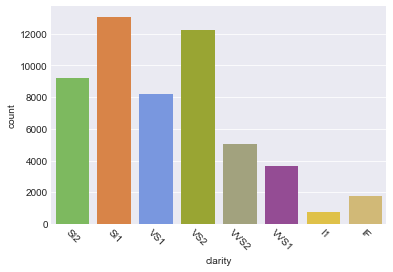

In [11]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
#create a bar plot of clarity frequency
sns.countplot(x='clarity',
              data=df_diamond,
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

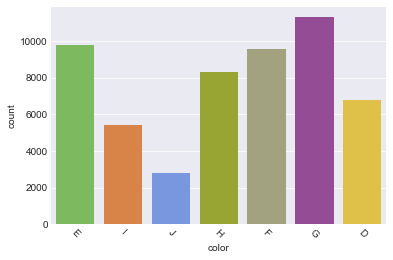

In [12]:
#create a bar plot of color frequency
sns.countplot(x='color',
              data=df_diamond,
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

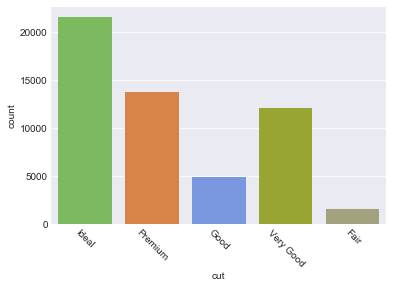

In [13]:
#create a bar plot of cut frequency
sns.countplot(x='cut',
              data=df_diamond,
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

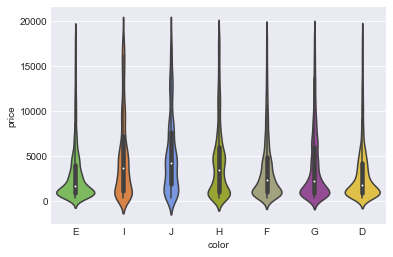

In [14]:
#add more details to scatterplot
sns.violinplot(x='color', y='price', data=df_diamond, 
           palette=pkmn_type_colors)   #color by evolution stage

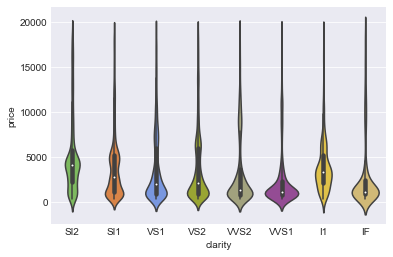

In [15]:
#add more details to scatterplot
sns.violinplot(x='clarity', y='price', data=df_diamond, 
           palette=pkmn_type_colors)   #color by evolution stage

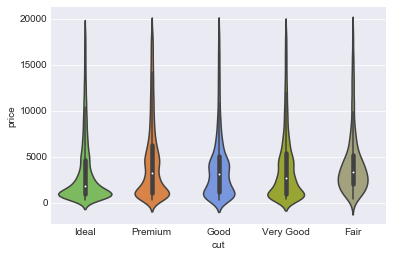

In [16]:
#add more details to scatterplot
sns.violinplot(x='cut', y='price', data=df_diamond, 
           palette=pkmn_type_colors)   #color by evolution stage

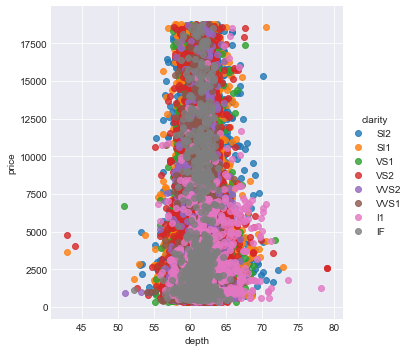

In [17]:
#add more details to scatterplot
sns.lmplot(x='depth', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='clarity')   #color by evolution stage

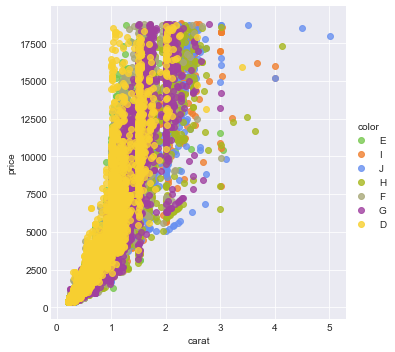

In [18]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='color',palette=pkmn_type_colors)   #color by evolution stage

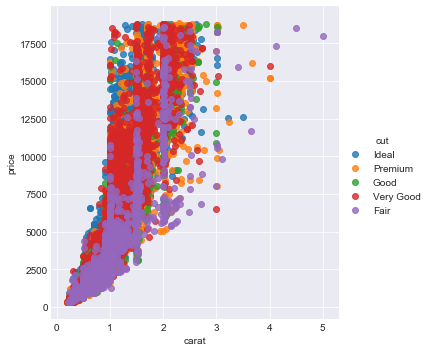

In [19]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='cut')   #color by evolution stage

In [20]:
#create a dataframe containing the stats for each 
#drop price
drop_df_diamond = df_diamond.drop(['price'], axis=1)
drop_df_diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z
Number,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


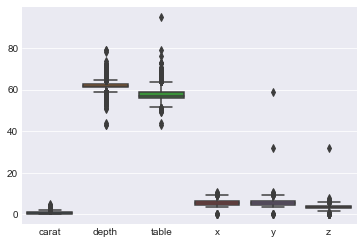

In [21]:
#boxplot showing stats for each characteristic
sns.boxplot(data=drop_df_diamond)

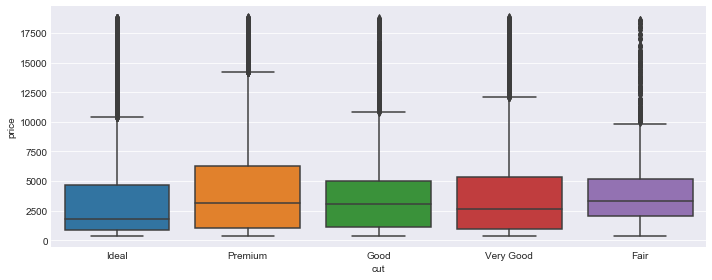

In [22]:
sns.factorplot(x='cut', y='price', data=df_diamond, kind='box' ,aspect=2.5 )

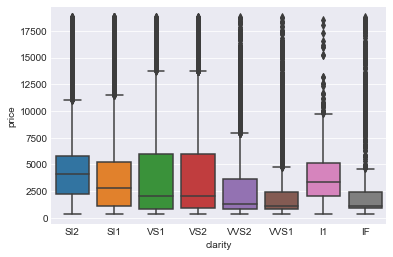

In [23]:
sns.boxplot(x='clarity', y='price', data=df_diamond )

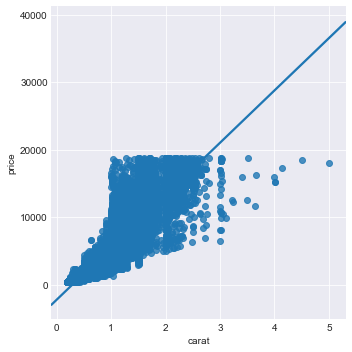

In [24]:
sns.lmplot(x='carat',y='price',data=df_diamond )

# Modeling and prediction

In [25]:
#dummy variables for passenger class embarkation port
#get_dummies will auto-drop columns that dummies were created from
model_df_diamond = pd.get_dummies(data=df_diamond, columns=['cut','color','clarity','y','z'])
model_df_diamond.head()

,carat,depth,table,price,x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,z_6.17,z_6.24,z_6.27,z_6.31,z_6.38,z_6.43,z_6.72,z_6.98,z_8.06,z_31.8
Number,,,,,,,,,,,,,,,,,,,,,
1,0.23,61.5,55.0,326,3.95,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.21,59.8,61.0,326,3.89,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.29,62.4,58.0,334,4.20,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.31,63.3,58.0,335,4.34,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
model_df_diamond.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       ...
       'z_6.17', 'z_6.24', 'z_6.27', 'z_6.31', 'z_6.38', 'z_6.43', 'z_6.72',
       'z_6.98', 'z_8.06', 'z_31.8'],
      dtype='object', length=952)

# LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
#X = model_df_diamond.drop('price', axis = 1)
X = df_diamond.drop(['color','clarity','cut','price'], axis = 1)
#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lm.fit(X, df_diamond.price)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 20849.316413
Number of coefficients: 6


In [29]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,carat,10686.309081
1,depth,-203.154052
2,table,-102.445652
3,x,-1315.667842
4,y,66.321602
5,z,41.627697


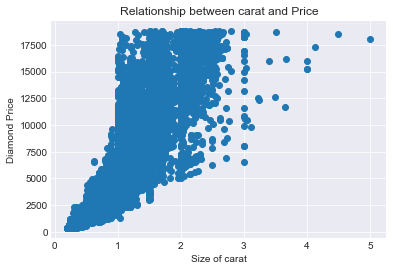

In [30]:
plt.scatter(df_diamond.carat, df_diamond.price) 
plt.xlabel("Size of carat") 
plt.ylabel("Diamond Price") 
plt.title("Relationship between carat and Price") 
plt.show()

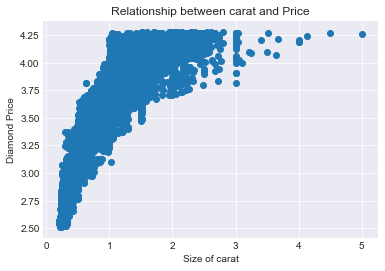

In [31]:
#because of the negative predicted price values let us use log scale
import math
plt.scatter(df_diamond.carat, np.log10(df_diamond.price) )
plt.xlabel("Size of carat") 
plt.ylabel("Diamond Price") 
plt.title("Relationship between carat and Price") 
plt.show()

In [32]:
lm.predict(X)[0:5]

array([ 346.90971807,  -71.46876469,  126.3686742 ,  193.9016389 ,
         53.54959143])

In [33]:
#import math
#print( math.log(1.5, 10)) m = np.log10(np.abs(x))
np.log10(lm.predict(X))[0:5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 2.54021647,         nan,  2.10163943,  2.28758148,  1.72875616])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


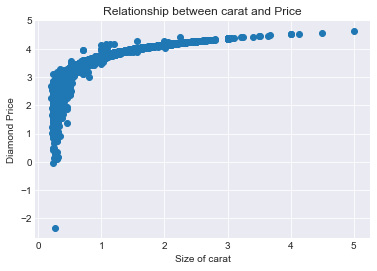

In [34]:
#import math
plt.scatter(df_diamond.carat, np.log10(lm.predict(X)) )
plt.xlabel("Size of carat") 
plt.ylabel("Diamond Price") 
plt.title("Relationship between carat and Price") 
plt.show()

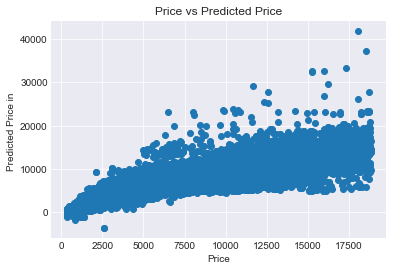

In [35]:
plt.scatter(df_diamond.price, lm.predict(X))
#plt.ylim((0,20500))
plt.xlabel("Price")
plt.ylabel("Predicted Price in ")
plt.title("Price vs Predicted Price")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


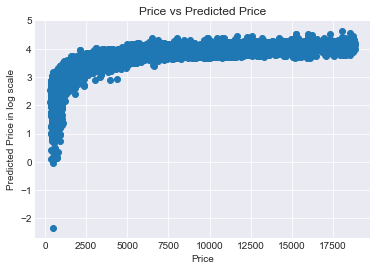

In [36]:
plt.scatter(df_diamond.price, np.log10(lm.predict(X)))
#plt.ylim((0,20500))
plt.xlabel("Price")
plt.ylabel("Predicted Price in log scale")
plt.title("Price vs Predicted Price")
plt.show()

In [37]:
#calculate mean squared error
mseFull = np.mean((df_diamond.price - lm.predict(X)) ** 2)
print(mseFull)

2240581.729542712


In [38]:
#Randomize and train/test your data
#test_size default = 0.25
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df_diamond.price, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(43152, 6)
(10788, 6)
(43152,)
(10788,)


In [39]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 2240288.1977717825
Fit a model X_train, and calculate MSE with X_test, Y_test: 2244401.332943773


# Logistic regression

In [40]:
#we will change the cut, color, clarity to numerical following the price/wt grouping, with 0 being cheapest and in increasing value
#df_diamond['cut']=df_diamond['cut'].map({'Fair':0,'Good':1,'Ideal':2,'Very Good':3,'Premium':4})
#df_diamond['color']=df_diamond['color'].map({'E':0,'J':1,'D':2,'I':3,'H':4,'F':5,'G':6})
#df_diamond['clarity']=df_diamond['clarity'].map({'I1':0,'SI1':1,'VVS1':2,'SI2':3,'VS2':4,'VS1':5,'VVS2':6,'IF':7})
####### another try
df_diamond['cut']=df_diamond['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
df_diamond['color']=df_diamond['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})
df_diamond['clarity']=df_diamond['clarity'].map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})
##### another try
#df_diamond['cut']=df_diamond['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
#df_diamond['color']=df_diamond['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
#df_diamond['clarity']=df_diamond['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


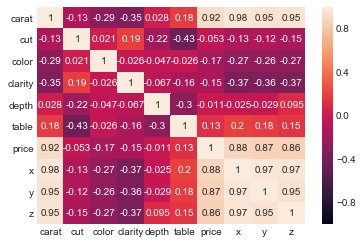

In [41]:
#correlation matrix
dia_corr2=df_diamond.corr()
#show it as a heast map
sns.heatmap(dia_corr2,vmin=-1,annot=True)

In [42]:
#extract target variable
#make copy of 'price' column
y = df_diamond['price']
#copy of modeldf without 'price' column
X = df_diamond.drop(['price'], axis=1)